<a href="https://colab.research.google.com/github/PatGeorgian/Patrick.Odita.BDAT1004PS-2/blob/main/Bernoulli_Naive__Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all required libraries

In [17]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load Dataset

In [18]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
# Assuming the dataset is in 'spam.xlsx' and the sheet name is 'spam'
df = pd.read_excel('spam.xlsx', sheet_name='spam')

Saving spam.xlsx to spam (1).xlsx


# Rename and convert data type

In [19]:
# Keep only relevant columns and rename them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Convert labels to binary (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


# Data cleaning

In [20]:
# Remove duplicates
df = df.drop_duplicates()

# Define text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    return re.sub(r'[^\w\s]', '', text)

In [21]:
# Apply text cleaning
df.loc[:, "message"] = df.loc[:, "message"].astype(str)
df.loc[:, "cleaned_message"] = df.loc[:, "message"].apply(clean_text)

# Convert text to numerical representation using TF-IDF(term frequency-inverse document frequency)

In [22]:
# Convert text to numerical representation using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["cleaned_message"])
y = df["label"]

# Testing

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bernoulli Naive Bayes classifier

In [24]:
# Train Bernoulli Naive Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Make predictions
y_pred = bnb.predict(X_test)

# Evaluation of Matrix

In [25]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Result

In [26]:
# Print results
print(f"Bernoulli Naive Bayes Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Bernoulli Naive Bayes Accuracy: 0.9758
Precision: 0.9918
Recall: 0.8345


# Plot results

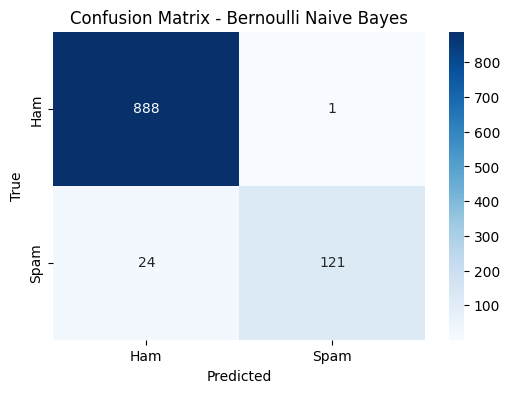

In [27]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Bernoulli Naive Bayes')
plt.show()
